# Computer Vision Coursework

# Question 1

1. Propose a technique to detect salient features of your choice on the video frames above.
Explain the type of features on which you will focus and justify your choice. (Word limit: 150
words)

2. Propose a technique to match the detected salientfeatures between the video frames. Explain
how you would approach this task and the steps you would follow. (Word limit: 150 words)


3. Use a programming environment of your choice to:


* [a]. Implement your proposed salient feature detector and plot the detected features on
the provided pair of frames.

# Import the relevant libraries

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Correct code- Final

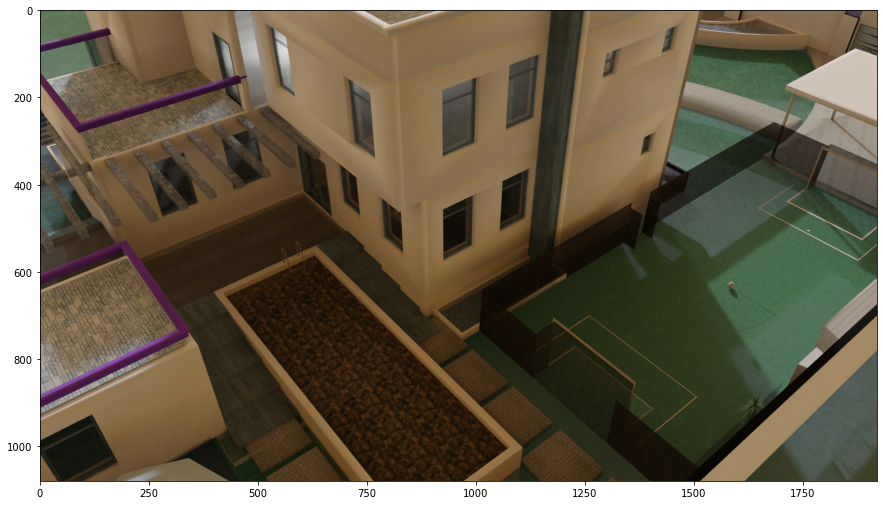

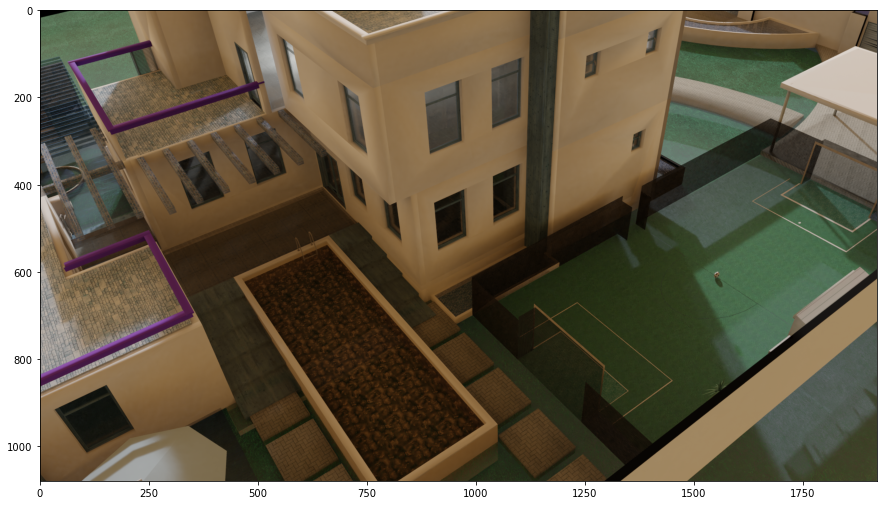

In [2]:
img1_col = cv.imread('COMP70058 Data\\Frame1.png')
img2_col = cv.imread('COMP70058 Data\\Frame2.png')

plt.figure(figsize=(15, 15))
plt.imshow(img1_col); plt.show()

plt.figure(figsize=(15, 15))
plt.imshow(img2_col); plt.show()

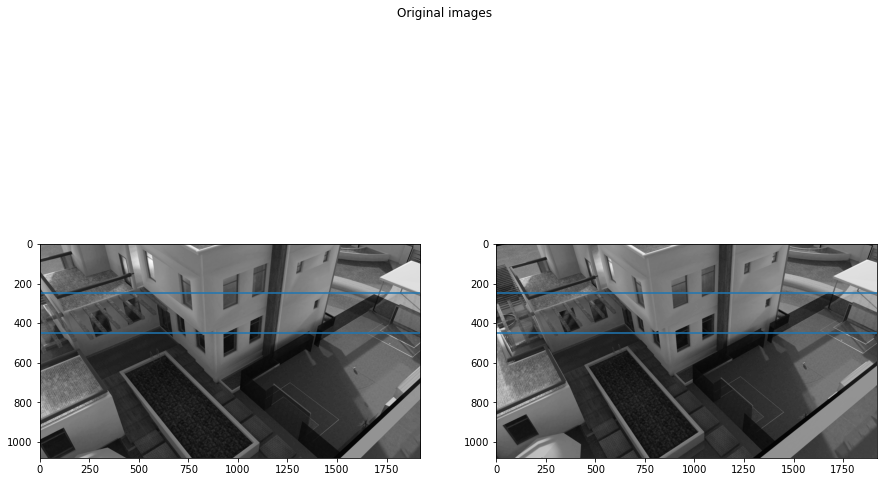

In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Read both images and convert to grayscale


img1 = cv.imread('COMP70058 Data\\Frame1.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('COMP70058 Data\\Frame2.png', cv.IMREAD_GRAYSCALE)

# ------------------------------------------------------------
# PREPROCESSING

# Compare unprocessed images
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].imshow(img1, cmap="gray")
axes[1].imshow(img2, cmap="gray")
axes[0].axhline(250)
axes[1].axhline(250)
axes[0].axhline(450)
axes[1].axhline(450)
plt.suptitle("Original images")
plt.show()

# Part 2

### 2a) Detecting Keypoints


In [4]:
# 1. Detect keypoints and their descriptors
# Based on: https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html

# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

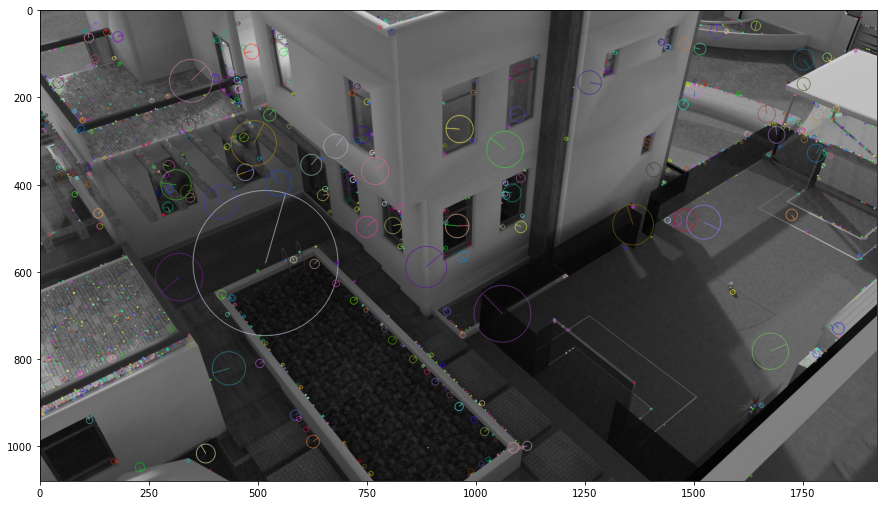

In [5]:
# Visualize keypoints
imgSift = cv.drawKeypoints(
    img1, kp1, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(15, 15))
plt.imshow(imgSift); plt.show()

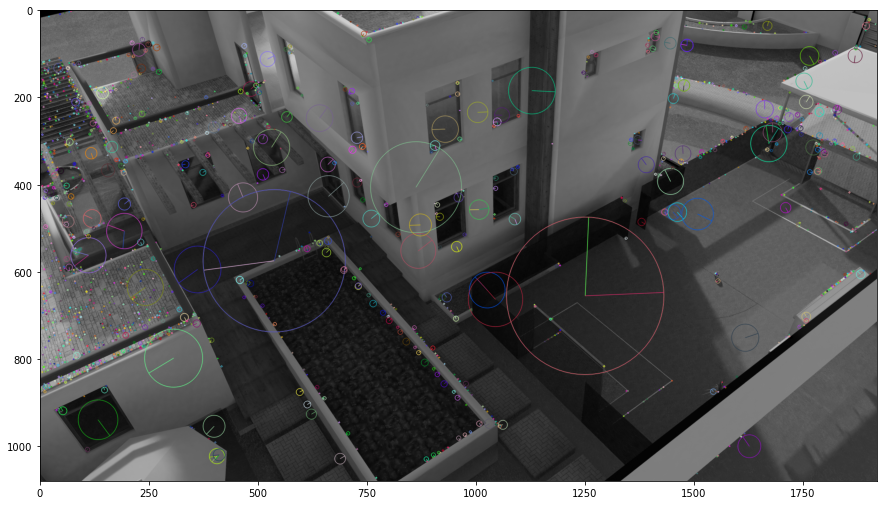

In [6]:
# Visualize keypoints
imgSift_2 = cv.drawKeypoints(
    img2, kp2, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(15, 15))
plt.imshow(imgSift_2); plt.show()

In [7]:
# !pip install opencv-python==3.3.0.10 opencv-contrib-python==3.3.0.10


### 2b) Matching Keypoints


In [8]:
# Match keypoints in both images
# Based on: https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Keep good matches: calculate distinctive image features
# Lowe, D.G. Distinctive Image Features from Scale-Invariant Keypoints. International Journal of Computer Vision 60, 91–110 (2004). https://doi.org/10.1023/B:VISI.0000029664.99615.94
# https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf
matchesMask = [[0, 0] for i in range(len(matches))]
good = []
pts1 = []
pts2 = []

for i, (m, n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        # Keep this keypoint pair
        matchesMask[i] = [1, 0]
        good.append(m)
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

In [9]:
len(matchesMask)


1469

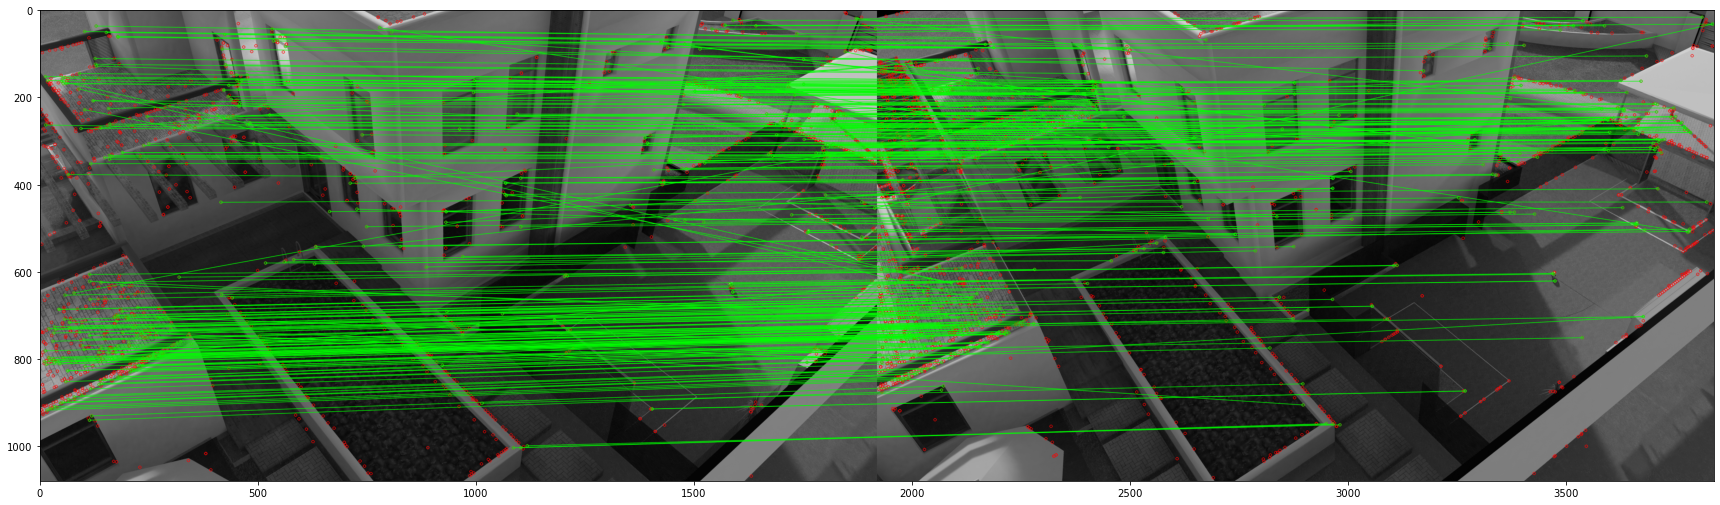

In [10]:
# Draw the keypoint matches between both pictures
# Still based on: https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html
draw_params = dict(matchColor=(0, 255, 0),
                   singlePointColor=(255, 0, 0),
                   matchesMask=matchesMask,
                   flags=cv.DrawMatchesFlags_DEFAULT)

keypoint_matches = cv.drawMatchesKnn(
    img1, kp1, img2, kp2, matches, None, **draw_params)
plt.figure(figsize=(30, 30))
plt.imshow(keypoint_matches); plt.show()

### 2c) Stereo Rectification


In [11]:
# ------------------------------------------------------------
# STEREO RECTIFICATION

# Calculate the fundamental matrix for the cameras
# https://docs.opencv.org/master/da/de9/tutorial_py_epipolar_geometry.html
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
fundamental_matrix, inliers = cv.findFundamentalMat(pts1, pts2, cv.FM_RANSAC)

# We select only inlier points
pts1 = pts1[inliers.ravel() == 1]
pts2 = pts2[inliers.ravel() == 1]

In [12]:
fundamental_matrix

array([[ 8.86903264e-08,  2.15480714e-06, -2.83349457e-03],
       [-1.07603427e-06, -7.03902427e-08, -2.23200185e-02],
       [ 2.09482648e-03,  1.96592731e-02,  1.00000000e+00]])

In [13]:
#### 3b Now estimate the fundamental matrix using the extrinsic and intrinsic camera parameters.

In [14]:
cam1_intrinsic=np.array([[1.600e+03, 0.000e+00, 9.595e+02],
[0.000e+00, 1.600e+03, 5.395e+02],
[0.000e+00, 0.000e+00, 1.000e+00]]) #K

cam1_extrinisic=np.array([[-6.32422984e-01, -7.74574101e-01, 8.72639567e-03, -2.36433081e+00],
[-5.00836670e-01, 4.00276423e-01, -7.67425179e-01, -1.74806440e+00],
[ 5.90934694e-01, -4.89707828e-01, -6.41079128e-01, 2.59576015e+01],
[ 0., 0., 0., 1.]])

cam2_intrinsic=np.array([[1.49333333e+03, 0.00000000e+00, 9.78700000e+02],
[0.00000000e+00, 1.49333333e+03, 5.20300000e+02],
[0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]) #K'


cam2_extrinisic=np.array([[-0.5845883, -0.81050003, -0.03669427, -2.39520617],
[-0.5041514, 0.39832053, -0.76627171, -1.79913743],
[ 0.6356793, -0.42945388, -0.64146805, 26.26804151],
[ 0., 0., 0., 1.]])


T_vec = np.array([-1.98989457, 0.00265269, 0.20979508])

R_vec=np.array([[ 0.9971792 , -0.00348069, 0.07497863],
[ 0.00362138, 0.99999203, -0.00174044],
[-0.07497205, 0.00200697, 0.99718366]])

# cam2_intrinsic*T_vec
k_t=np.matmul(cam2_intrinsic,T_vec)
ax,ay,az=k_t[0],k_t[1],k_t[2]
k_t

array([-2.76624944e+03,  1.13117731e+02,  2.09795080e-01])

In [15]:
k_t_manipulated=np.array([[0,-az,ay],[az,0,-ax],[-ay,ax,0]])
k_t_manipulated

array([[ 0.00000000e+00, -2.09795080e-01,  1.13117731e+02],
       [ 2.09795080e-01,  0.00000000e+00,  2.76624944e+03],
       [-1.13117731e+02, -2.76624944e+03,  0.00000000e+00]])

In [16]:
inverse_k=np.linalg.inv(cam1_intrinsic)

k_t_manipulated_k=np.matmul(k_t_manipulated,cam2_intrinsic)
k_t_manipulated_k_R=np.matmul(k_t_manipulated_k,R_vec)
k_t_manipulated_k_R_inverse_k=np.matmul(k_t_manipulated_k_R,inverse_k)
F_matrix=k_t_manipulated_k_R_inverse_k
F_matrix

array([[-8.94716958e-04, -1.95802211e-01,  1.10989237e+02],
       [ 5.60156937e-02,  3.04586526e-03,  2.93130697e+03],
       [-4.19999288e+01, -2.58338899e+03, -1.17061260e+05]])

In [17]:
F_matrix_normalized=F_matrix/F_matrix[-1][-1]
F_matrix_normalized

array([[ 7.64315161e-09,  1.67264739e-06, -9.48129529e-04],
       [-4.78516067e-07, -2.60194129e-08, -2.50407946e-02],
       [ 3.58785894e-04,  2.20686928e-02,  1.00000000e+00]])

In [18]:
cam2_intrinsic=np.array([[1.600e+03, 0.000e+00, 9.595e+02],
[0.000e+00, 1.600e+03, 5.395e+02],
[0.000e+00, 0.000e+00, 1.000e+00]]) #K

cam1_extrinisic=np.array([[-6.32422984e-01, -7.74574101e-01, 8.72639567e-03, -2.36433081e+00],
[-5.00836670e-01, 4.00276423e-01, -7.67425179e-01, -1.74806440e+00],
[ 5.90934694e-01, -4.89707828e-01, -6.41079128e-01, 2.59576015e+01],
[ 0., 0., 0., 1.]])

cam1_intrinsic=np.array([[1.49333333e+03, 0.00000000e+00, 9.78700000e+02],
[0.00000000e+00, 1.49333333e+03, 5.20300000e+02],
[0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]) #K'


cam2_extrinisic=np.array([[-0.5845883, -0.81050003, -0.03669427, -2.39520617],
[-0.5041514, 0.39832053, -0.76627171, -1.79913743],
[ 0.6356793, -0.42945388, -0.64146805, 26.26804151],
[ 0., 0., 0., 1.]])


T_vec = np.array([-1.98989457, 0.00265269, 0.20979508])

R_vec=np.array([[ 0.9971792 , -0.00348069, 0.07497863],
[ 0.00362138, 0.99999203, -0.00174044],
[-0.07497205, 0.00200697, 0.99718366]])

# cam2_intrinsic*T_vec
k_t=np.matmul(cam2_intrinsic,T_vec)
ax,ay,az=k_t[0],k_t[1],k_t[2]
k_t_manipulated=np.array([[0,-az,ay],[az,0,-ax],[-ay,ax,0]])
inverse_k=np.linalg.inv(cam1_intrinsic)

k_t_manipulated_k=np.matmul(k_t_manipulated,cam2_intrinsic)
k_t_manipulated_k_R=np.matmul(k_t_manipulated_k,R_vec)
k_t_manipulated_k_R_inverse_k=np.matmul(k_t_manipulated_k_R,inverse_k)
F_matrix=k_t_manipulated_k_R_inverse_k
F_matrix_normalized=F_matrix/F_matrix[-1][-1]
F_matrix_normalized


array([[ 1.07581910e-07,  2.35435081e-05, -1.28594819e-02],
       [-6.73539860e-06, -3.66238731e-07, -3.28400188e-01],
       [ 5.29943804e-03,  3.34909166e-01,  1.00000000e+00]])

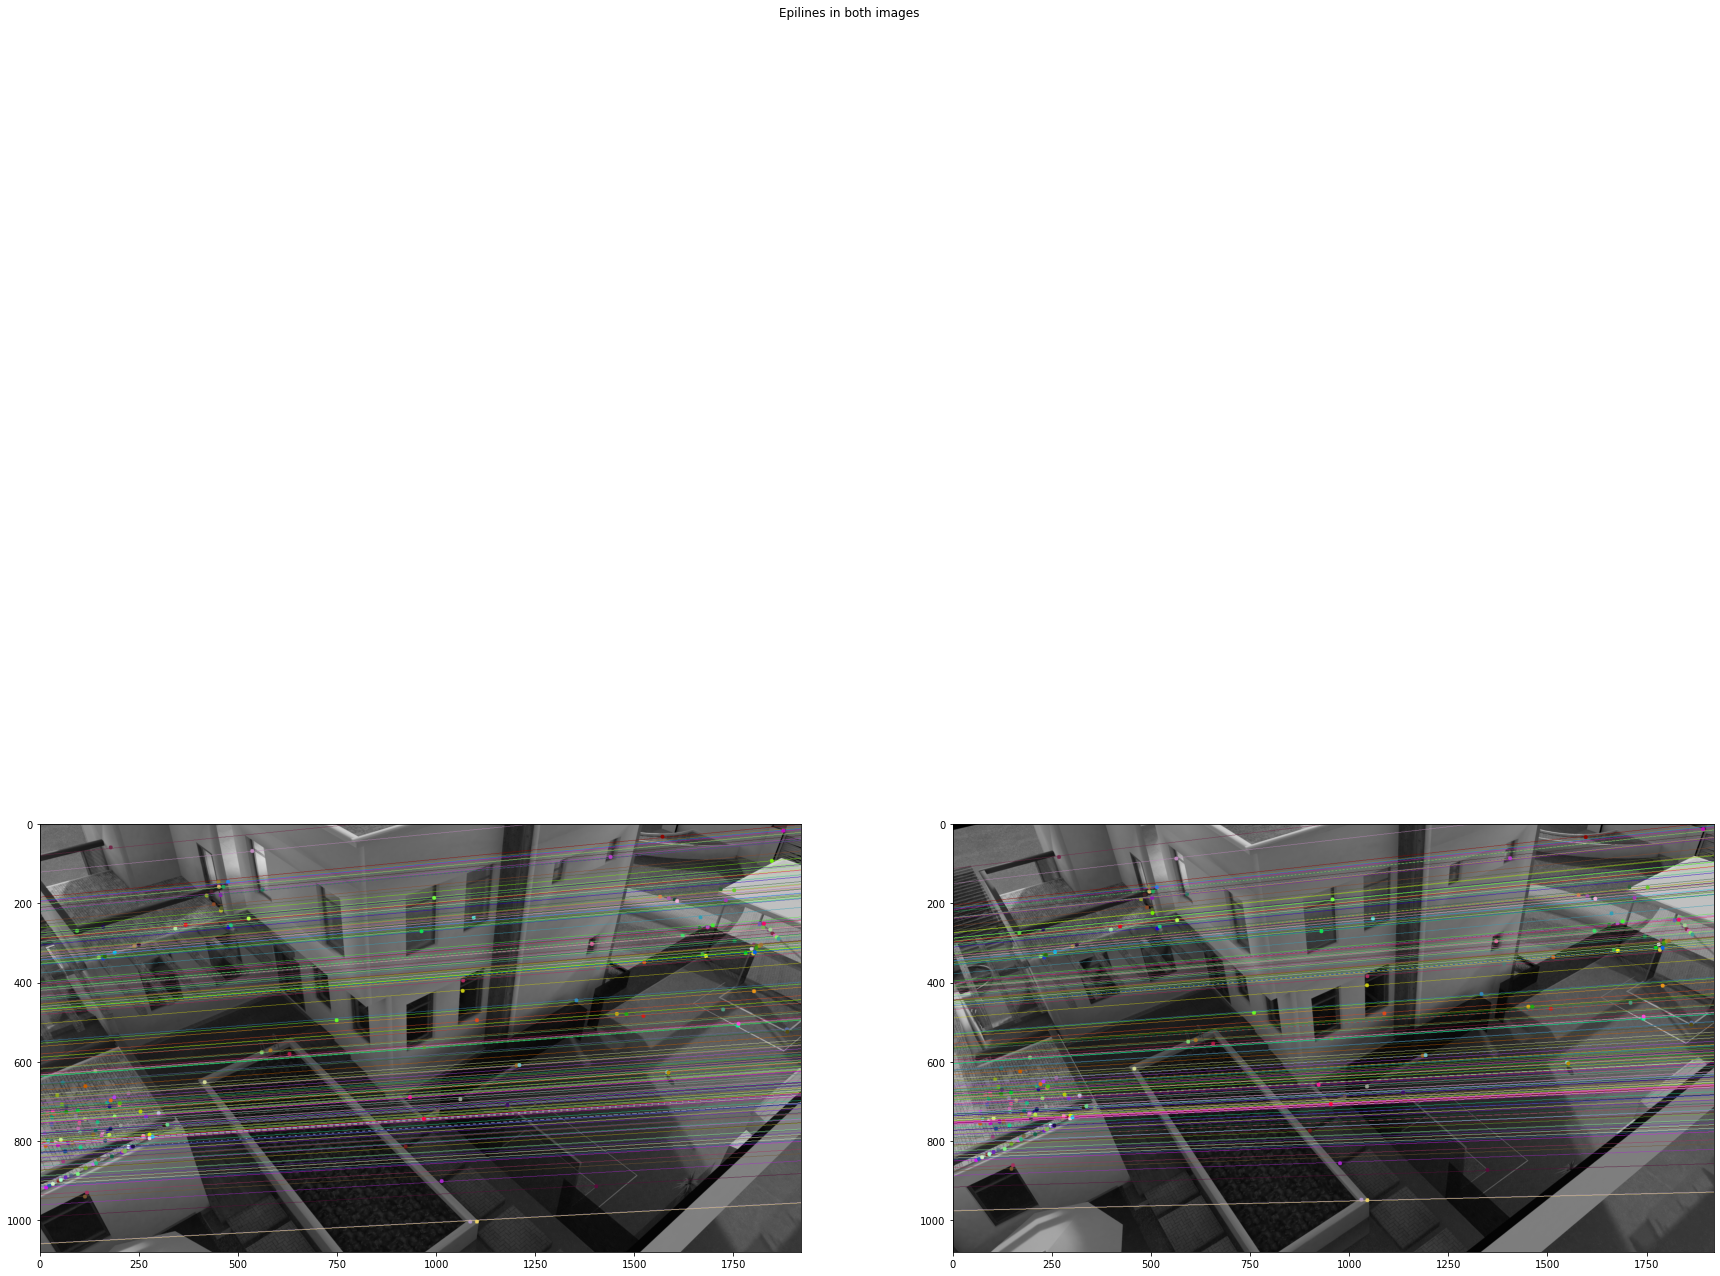

In [19]:
# Visualize epilines
# Adapted from: https://docs.opencv.org/master/da/de9/tutorial_py_epipolar_geometry.html
def drawlines(img1src, img2src, lines, pts1src, pts2src):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r, c = img1src.shape
    img1color = cv.cvtColor(img1src, cv.COLOR_GRAY2BGR)
    img2color = cv.cvtColor(img2src, cv.COLOR_GRAY2BGR)
    # Edit: use the same random seed so that two images are comparable!
    np.random.seed(0)
    for r, pt1, pt2 in zip(lines, pts1src, pts2src):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2]/r[1]])
        x1, y1 = map(int, [c, -(r[2]+r[0]*c)/r[1]])
        img1color = cv.line(img1color, (x0, y0), (x1, y1), color, 1)
        img1color = cv.circle(img1color, tuple(pt1), 5, color, -1)
        img2color = cv.circle(img2color, tuple(pt2), 5, color, -1)
    return img1color, img2color


# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv.computeCorrespondEpilines(
    pts2.reshape(-1, 1, 2), 2, fundamental_matrix)
lines1 = lines1.reshape(-1, 3)
img5, img6 = drawlines(img1, img2, lines1, pts1, pts2)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv.computeCorrespondEpilines(
    pts1.reshape(-1, 1, 2), 1, fundamental_matrix)
lines2 = lines2.reshape(-1, 3)
img3, img4 = drawlines(img2, img1, lines2, pts2, pts1)


plt.figure(figsize=(30, 30))

plt.subplot(121), plt.imshow(img5)
plt.subplot(122), plt.imshow(img3)
plt.suptitle("Epilines in both images")
plt.show()

In [20]:
# Stereo rectification (uncalibrated variant)
# Adapted from: https://stackoverflow.com/a/62607343
h1, w1 = img1.shape
h2, w2 = img2.shape
_, H1, H2 = cv.stereoRectifyUncalibrated(
    np.float32(pts1), np.float32(pts2), fundamental_matrix, imgSize=(w1, h1)
)#change this to stero rectifier to get Q for 3d reconstruction

In [21]:
h1, w1 = img1.shape
h2, w2 = img2.shape


cam1=np.array([[1.600e+03, 0.000e+00, 9.595e+02],
[0.000e+00, 1.600e+03, 5.395e+02],
[0.000e+00, 0.000e+00, 1.000e+00]])


cam2=np.array([[1.49333333e+03, 0.00000000e+00, 9.78700000e+02],
[0.00000000e+00, 1.49333333e+03, 5.20300000e+02],
[0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

distCoeff1= np.array([0.0, 0.0, 0.0, 0.0, 0.0])
distCoeff2=np.array([0.0, 0.0, 0.0, 0.0, 0.0])

R_vec=np.array([[ 0.9971792 , -0.00348069, 0.07497863],
[ 0.00362138, 0.99999203, -0.00174044],
[-0.07497205, 0.00200697, 0.99718366]])


T_vec = np.array([-1.98989457, 0.00265269, 0.20979508])

rev_proj_matrix=np.zeros((4,4))

Q=cv.stereoRectify(cameraMatrix1 = cam1,cameraMatrix2 = cam2, \
                  distCoeffs1 = 0, distCoeffs2 = 0, \
                  imageSize = img1.shape[:2], \
                  R = R_vec, T = T_vec, \
                  R1 = None, R2 = None, \
                  P1 =  None, P2 =  None, Q = rev_proj_matrix);


##### Q value

In [22]:
# S = cv.stereoRectify(cameraMatrix1=cam1, distCoeffs1=distCoeff1, cameraMatrix2=cam2, distCoeffs2=distCoeff2, imageSize=img1.shape[:2], R=R_vec, T=T_vec)
R1,R2,P1,P2,Q,roi1,roi2 = cv.stereoRectify(cameraMatrix1=cam1, distCoeffs1=distCoeff1, cameraMatrix2=cam2, distCoeffs2=distCoeff2, imageSize=img1.shape[:2], R=R_vec, T=T_vec)
Q

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.10228683e+03],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        -5.19747940e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.54666666e+03],
       [ 0.00000000e+00,  0.00000000e+00,  4.99768822e-01,
        -0.00000000e+00]])

In [23]:
Q.shape

(4, 4)

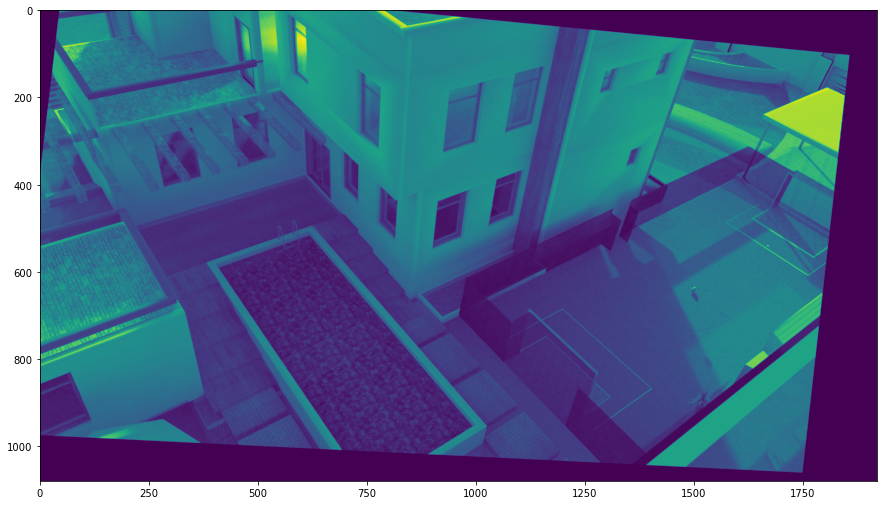

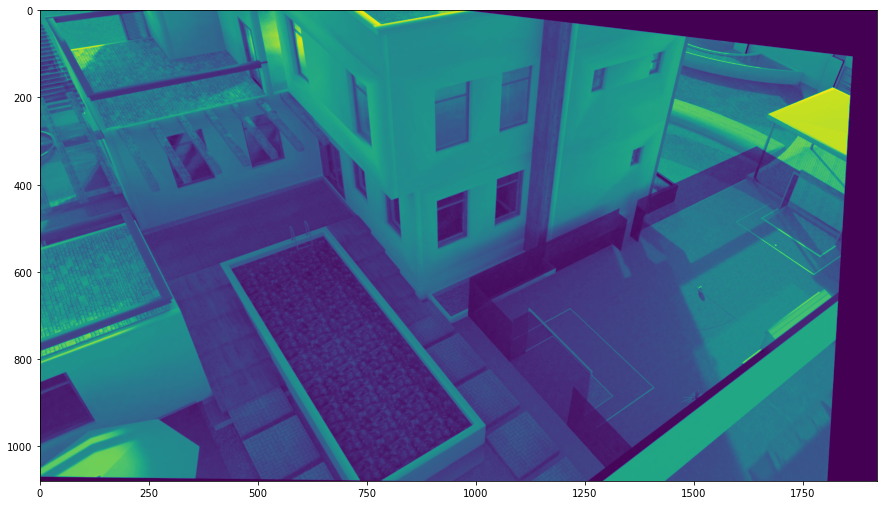

In [24]:
# Undistort (rectify) the images and save them
# Adapted from: https://stackoverflow.com/a/62607343
img1_rectified = cv.warpPerspective(img1, H1, (w1, h1))
img2_rectified = cv.warpPerspective(img2, H2, (w2, h2))


plt.figure(figsize=(15, 15))
plt.imshow(img1_rectified); plt.show()

plt.figure(figsize=(15, 15))
plt.imshow(img2_rectified); plt.show()

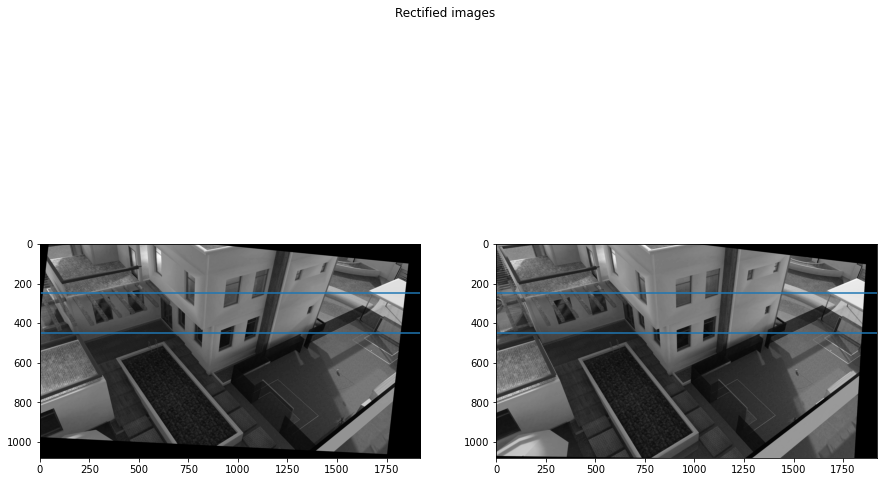

In [26]:
# Draw the rectified images
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].imshow(img1_rectified, cmap="gray")
axes[1].imshow(img2_rectified, cmap="gray")
axes[0].axhline(250)
axes[1].axhline(250)
axes[0].axhline(450)
axes[1].axhline(450)
plt.suptitle("Rectified images")
plt.savefig("rectified_images.png")
plt.show()

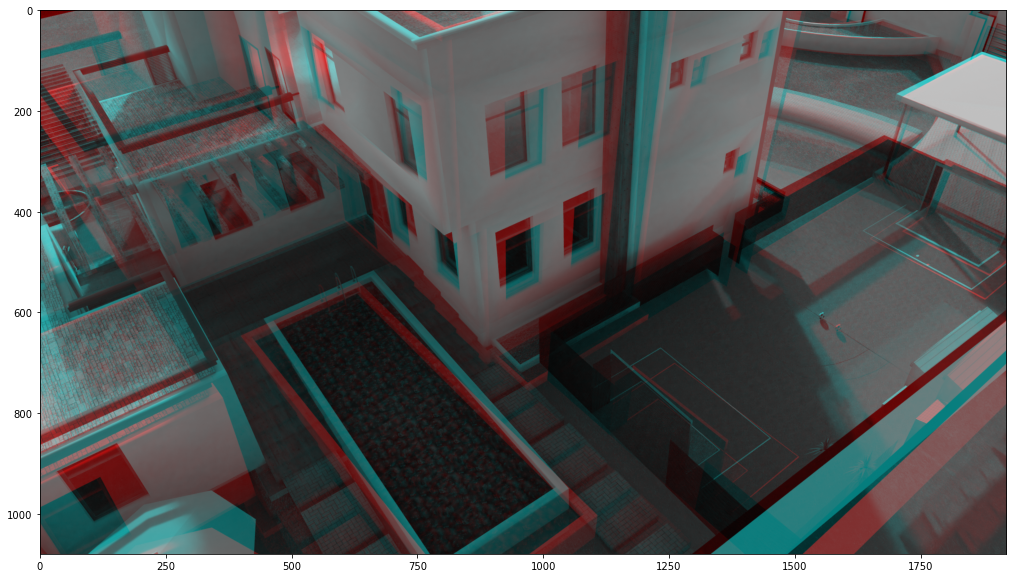

In [27]:
image = np.zeros((img1_rectified.shape[0],img1_rectified.shape[1],3))

image[:,:,0] = img1/256
image[:,:,2] = img2/256
image[:,:,1] = img2/256

plt.figure(figsize = (25,10))
plt.imshow(image)

# 3. Stereo Matching for the Disparity Map (Depth Map)

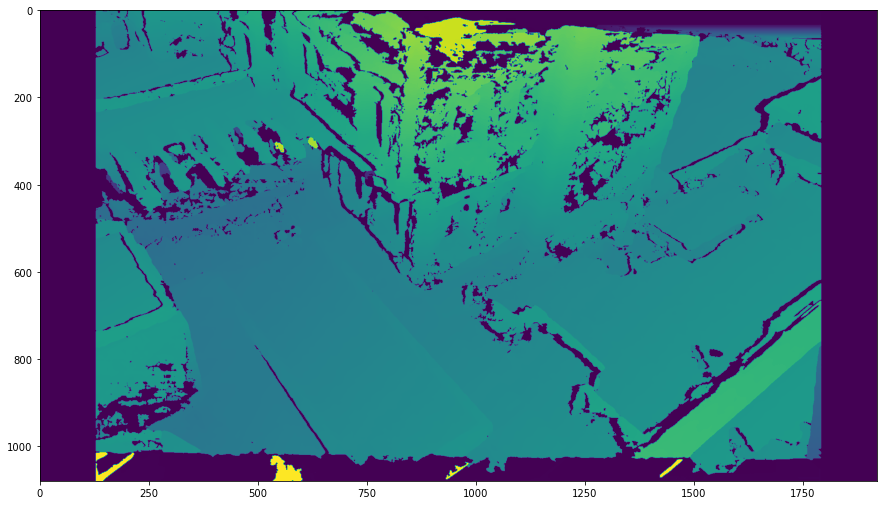

In [300]:
# ------------------------------------------------------------
# CALCULATE DISPARITY (DEPTH MAP)
# Adapted from: https://github.com/opencv/opencv/blob/master/samples/python/stereo_match.py
# and: https://docs.opencv.org/master/dd/d53/tutorial_py_depthmap.html

# StereoSGBM Parameter explanations:
# https://docs.opencv.org/4.5.0/d2/d85/classcv_1_1StereoSGBM.html

# Matched block size. It must be an odd number >=1 . Normally, it should be somewhere in the 3..11 range.
block_size = 11 #11
min_disp = -128 #-128
max_disp =  128#128
# Maximum disparity minus minimum disparity. The value is always greater than zero.
# In the current implementation, this parameter must be divisible by 16.
num_disp = max_disp - min_disp
# Margin in percentage by which the best (minimum) computed cost function value should "win" the second best value to consider the found match correct.
# Normally, a value within the 5-15 range is good enough
uniquenessRatio = 5
# Maximum size of smooth disparity regions to consider their noise speckles and invalidate.
# Set it to 0 to disable speckle filtering. Otherwise, set it somewhere in the 50-200 range.
speckleWindowSize = 200
# Maximum disparity variation within each connected component.
# If you do speckle filtering, set the parameter to a positive value, it will be implicitly multiplied by 16.
# Normally, 1 or 2 is good enough.
speckleRange = 2
disp12MaxDiff = 0

stereo = cv.StereoSGBM_create(
    minDisparity=min_disp,
    numDisparities=num_disp,
    blockSize=block_size,
    uniquenessRatio=uniquenessRatio,
    speckleWindowSize=speckleWindowSize,
    speckleRange=speckleRange,
    disp12MaxDiff=disp12MaxDiff,
    P1=8 * 1 * block_size * block_size,
    P2=32 * 1 * block_size * block_size,
)
disparity_SGBM = stereo.compute(img1_rectified, img2_rectified)

# Normalize the values to a range from 0..255 for a grayscale image
disparity_SGBM = cv.normalize(disparity_SGBM, disparity_SGBM, alpha=255,
                              beta=0, norm_type=cv.NORM_MINMAX)
disparity_SGBM = np.uint8(disparity_SGBM)
# cv.imshow("Disparity", disparity_SGBM)
# cv.imwrite("disparity_SGBM_norm.png", disparity_SGBM)

plt.figure(figsize=(15, 15))
# plt.imshow(disparity_SGBM); plt.show()

plt.imshow(disparity_SGBM)
# plt.colorbar()
plt.show()

In [274]:
Q

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.10228683e+03],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        -5.19747940e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.54666666e+03],
       [ 0.00000000e+00,  0.00000000e+00,  4.99768822e-01,
        -0.00000000e+00]])

In [275]:
# Convert to 3D
#Reproject points into 3D
points_3D = cv.reprojectImageTo3D(disparity_SGBM, Q)

#Get color points
colors = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

#Get rid of points with value 0 (i.e no depth)
mask_map = disparity_SGBM > disparity_SGBM.min()
#Mask colors and points. 
output_points = points_3D[mask_map]
output_colors = colors[mask_map]
#Define name for output file
output_file = 'reconstructed.ply'


In [100]:
def showImg(img):
    plt.imshow(cv.cvtColor(img, cv2.COLOR_RGB2BGR))
    
def write_ply(fn, verts, colors):
    ply_header = '''ply
    format ascii 1.0
    element vertex %(vert_num)d
    property float x
    property float y
    property float z
    property uchar red
    property uchar green
    property uchar blue
    end_header
    '''
    out_colors = colors.copy()
    verts = verts.reshape(-1, 3)
    verts = np.hstack([verts, out_colors])
    with open(fn, 'wb') as f:
        f.write((ply_header % dict(vert_num=len(verts))).encode('utf-8'))
        np.savetxt(f, verts, fmt='%f %f %f %d %d %d ')

In [103]:
#reflect on x axis
points = cv.reprojectImageTo3D(disparity_SGBM, Q) # inputs: disparity image and Q

reflect_matrix = np.identity(3)
reflect_matrix[0] *= -1
points = np.matmul(points,reflect_matrix)

#extract colors from image
img1_color = cv.imread('COMP70058 Data\\Frame1.png')
img2_color = cv.imread('COMP70058 Data\\Frame2.png')
colors = cv.cvtColor(img2_color, cv.COLOR_BGR2RGB) #inputs: Original image and 

#filter by min disparity
mask = disparity_SGBM > disparity_SGBM.min()
out_points = points[mask]
out_colors = colors[mask]

#filter by dimension
idx = np.fabs(out_points[:,0]) < 4.5
out_points = out_points[idx]
out_colors = out_colors.reshape(-1, 3)
out_colors = out_colors[idx]

write_ply('out.ply', out_points, out_colors)
print('%s saved' % 'out.ply')

C:\Users\Joshan\AppData\Local\Temp\ipykernel_27532\1836929078.py:6: RuntimeWarning: invalid value encountered in matmul
  points = np.matmul(points,reflect_matrix)


out.ply saved


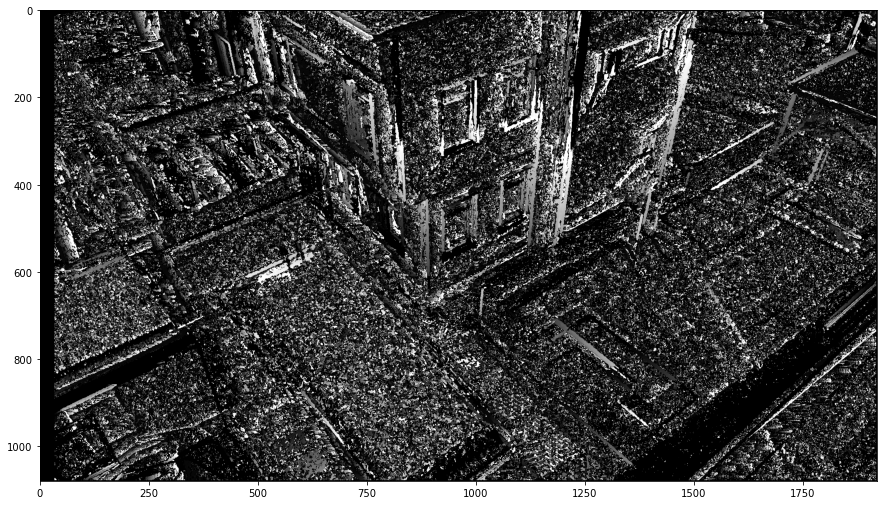

In [67]:
#Ugos stero code 
# stereo = cv.StereoBM_create(numDisparities=32, blockSize=5)
# disparity = stereo.compute(img1,img2)
# #min_disp,max_disp=disparity.min(),disparity.max()
# #disparity = np.int8(255*(disparity-min_disp)/(max_disp-min_disp))
# plt.figure(figsize=(15, 15))
# plt.imshow(disparity,'gray')
# plt.show()